<center>

<a href="http://www.insa-toulouse.fr/" ><img src="logo-insa.png" style="float:left; max-width: 250px; display: inline" alt="INSA"/></a>

<a href="http://onera.fr/" ><img src="logo-onera.png" style="float:right; max-width: 250px; display: inline" alt="ONERA"/></a>

</center>

# **Table of content**

The notebook is followed by this procedure:

- [1. Load the libraries and dataset](): 
  - Load the necessary libraries and our excel dataset `DeLiAn`.
  - Rename the sheets in a more meaningful and concise way.
- [2. Data-Preprocessing](): 
  - Select the interessed sheets and convert them into a dataframe.
  - Visualize to better understand the data.
  - Impute the missing values and check the quality of `df_imputed`.
  - Generate the new data and we have the dataframe `df_generated`.
  - Calculate the others intensive optical properties and we have the dataframe `df_extended`.
  - Reduce the dimensions of the data with PCA and we have the dataframe `df_pca`.
- [3. Build the classification models]():
  - Train-test split of each dataframe and standardize the data.
  - Create the function `select_model` to select the best hyperparameters of a type of model and perform the classification on a given dataframe.
  - Perform the classification on all the dataframe we have with the selected models of some Machine Learning methods.
  - Variables (properties) selections and check that which properties are appropriate for which aerosols.
- [4. Conclusion]()

# **1. Load the libraries and dataset**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme(style='darkgrid', palette='colorblind')
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
import matplotlib.pyplot as plt
%matplotlib inline

We have already rearranged the sheets of `DeLiAn` in a proper order (an intensive optical property followed by its errors) to create the new excel file `DeLiAn_edited`.

In [117]:
path    = 'data/'  # If data in 'data' directory
delian = pd.read_excel(path + 'DeLiAn_edited.xlsx', sheet_name=None) 

Now delian is a dictionary where **each key is the sheet name** and **each value is the corresponding DataFrame**.

In [120]:
for sheet_name in delian.keys():
    print(f"Sheet Name: {sheet_name}")
    print("----------------------------------------------------------------")

Sheet Name: List of variables
----------------------------------------------------------------
Sheet Name: 1
----------------------------------------------------------------
Sheet Name: 6
----------------------------------------------------------------
Sheet Name: 2
----------------------------------------------------------------
Sheet Name: 7
----------------------------------------------------------------
Sheet Name: 3
----------------------------------------------------------------
Sheet Name: 8
----------------------------------------------------------------
Sheet Name: 13
----------------------------------------------------------------
Sheet Name: 9
----------------------------------------------------------------
Sheet Name: 14
----------------------------------------------------------------
Sheet Name: 10
----------------------------------------------------------------
Sheet Name: 18
----------------------------------------------------------------
Sheet Name: 11
-----------------

Names of the sheets (except the sheet `List of variables`) are difficult to understand, because they are all hidden. Thus, we remame the sheets based on the sheet `List of variables`.

In [121]:
delian['List of variables']

,Sheet,Variables (unit),Description
0,1,angstrom_exponent_backscatter_355_532 (1),Angstrom exponent at 355/532 nm backscatter-re...
1,2,angstrom_exponent_backscatter_532_1064 (1),Angstrom exponent at 532/1064 nm backscatter-r...
2,3,angstrom_exponent_extinction_355_532 (1),Angstrom exponent at 355/532 nm extinction-rel...
3,4,campaign_rv,Name of the campaign or of the research vessel
4,5,date,Date of the lidar observations (DD-MM-YYYY or ...
5,6,error_angstrom_exponent_backscatter_355_532 (1),Error of the angstrom exponent at 355/532 nm b...
6,7,error_angstrom_exponent_backscatter_532_1064 (1),Error of the angstrom exponent at 532/1064 nm ...
7,8,error_angstrom_exponent_extinction_355_532 (1),Error of the angstrom exponent at 355/532 nm e...
8,9,error_lidar_ratio_355 (sr),Error of the lidar ratio of the aerosol catego...
9,10,error_lidar_ratio_532 (sr),Error of the lidar ratio of the aerosol catego...


In [122]:
variable_names = delian['List of variables']
# Iterate through each sheet and rename them
for sheet_name in delian.keys():
    if sheet_name != 'List of variables':
        # Filter the rows based on the condition and selecting the 'Variables (unit)' column
        new_sheet_name = variable_names.loc[variable_names['Sheet'] == int(sheet_name), 'Variables (unit)'].values[0]
        delian[new_sheet_name] = delian.pop(sheet_name)
        
delian.keys()

dict_keys(['List of variables', 'angstrom_exponent_backscatter_355_532 (1)', 'error_angstrom_exponent_backscatter_355_532 (1)', 'angstrom_exponent_backscatter_532_1064 (1)', 'error_angstrom_exponent_backscatter_532_1064 (1)', 'angstrom_exponent_extinction_355_532 (1)', 'error_angstrom_exponent_extinction_355_532 (1)', 'lidar_ratio_355 (sr)', 'error_lidar_ratio_355 (sr)', 'lidar_ratio_532 (sr)', 'error_lidar_ratio_532 (sr)', 'particle_linear_depolarization_ratio_355 (%)', 'error_particle_linear_depolarization_ratio_355 (%)', 'particle_linear_depolarization_ratio_532 (%)', 'error_particle_linear_depolarization_ratio_532 (%)', 'number_samples (1)', 'campaign_rv', 'date', 'location', 'measurement_type', 'reference', 'system'])

# **2. Data Preprocessing**

## **2.1. Convert the dataset to a dataframe**

Firstly, because our dataset is in excel format with each sheet is a variable or an information, we need to select the sheets we are interested in (the 7 sheets about intensive optical properties and the sheet number of samples) and then convert them to a dataframe.

The sheet `number_samples (1)` show how many times each aerosol type has been sampled (measured) by Lidar.

In [123]:
samples = delian['number_samples (1)']
samples

,Ash,Saharan dust,Central Asian dust,Middle Eastern dust,Smoke,Stratospheric smoke,Dust and smoke,Pollution,Dust and pollution,Dried marine,Clean marine,Dust and marine,Central European background
0,4,30,23,4,71,8,25,42,15,7,52,21,14


We can define a new dataframe containing the label (type of aerosol) of all observations based on this sheet.

In [6]:
aerosol = []
for col in samples.columns:
  for i in range(int(samples[col].iloc[0])):
    aerosol.append(col)
aerosol = pd.DataFrame({"aerosol": aerosol})
aerosol['aerosol'] = aerosol['aerosol'].astype('category') #convert type from Object to Categorical
aerosol

,aerosol
0,Ash
1,Ash
2,Ash
3,Ash
4,Saharan dust
...,...
311,Central European background
312,Central European background
313,Central European background
314,Central European background


We are interested in the sheets containing data about the intensive optical properties of aerosols.

In [7]:
quantitatives = [
    'angstrom_exponent_backscatter_355_532 (1)',
    'error_angstrom_exponent_backscatter_355_532 (1)',
    'angstrom_exponent_backscatter_532_1064 (1)',
    'error_angstrom_exponent_backscatter_532_1064 (1)',
    'angstrom_exponent_extinction_355_532 (1)',
    'error_angstrom_exponent_extinction_355_532 (1)',
    'lidar_ratio_355 (sr)',
    'error_lidar_ratio_355 (sr)',
    'lidar_ratio_532 (sr)',
    'error_lidar_ratio_532 (sr)',
    'particle_linear_depolarization_ratio_355 (%)',
    'error_particle_linear_depolarization_ratio_355 (%)',
    'particle_linear_depolarization_ratio_532 (%)',
    'error_particle_linear_depolarization_ratio_532 (%)'
]
delian = {key: delian[key] for key in quantitatives}

In [8]:
properties = [
    'angstrom_exponent_backscatter_355_532 (1)',
    'angstrom_exponent_backscatter_532_1064 (1)',
    'angstrom_exponent_extinction_355_532 (1)',
    'lidar_ratio_355 (sr)',
    'lidar_ratio_532 (sr)',
    'particle_linear_depolarization_ratio_355 (%)',
    'particle_linear_depolarization_ratio_532 (%)',
]

In [9]:
errors = [
    'error_angstrom_exponent_backscatter_355_532 (1)',
    'error_angstrom_exponent_backscatter_532_1064 (1)',
    'error_angstrom_exponent_extinction_355_532 (1)',
    'error_lidar_ratio_355 (sr)',
    'error_lidar_ratio_532 (sr)',
    'error_particle_linear_depolarization_ratio_355 (%)',
    'error_particle_linear_depolarization_ratio_532 (%)'
]

We need to convert each data in a sheet (a variable) into a familiar form (a column in a dataframe). The following cell wil do this mission.

In [10]:
delian_df = pd.DataFrame()

# Iterate through each sheet and extract information
for sheet_name, df in delian.items():
  new_values = []
  for col in df.columns:
    for value in df[col]:
      # Check if the value is not NaN
      if pd.notna(value):
        new_values.append(value)
  new_df = pd.DataFrame({sheet_name: new_values})
  delian_df = pd.concat([delian_df, new_df], axis=1)

delian_df = pd.concat([delian_df, aerosol], axis=1) #concatenate with the labels
delian_df

,angstrom_exponent_backscatter_355_532 (1),error_angstrom_exponent_backscatter_355_532 (1),angstrom_exponent_backscatter_532_1064 (1),error_angstrom_exponent_backscatter_532_1064 (1),angstrom_exponent_extinction_355_532 (1),error_angstrom_exponent_extinction_355_532 (1),lidar_ratio_355 (sr),error_lidar_ratio_355 (sr),lidar_ratio_532 (sr),error_lidar_ratio_532 (sr),particle_linear_depolarization_ratio_355 (%),error_particle_linear_depolarization_ratio_355 (%),particle_linear_depolarization_ratio_532 (%),error_particle_linear_depolarization_ratio_532 (%),aerosol
0,-9999.00,-9999.0,-9999.00,-9999.00,-9999.00,-9999.00,55.00,5.00,-9999.0,-9999.0,36.50,1.0,-9999.0,-9999.0,Ash
1,-9999.00,-9999.0,-9999.00,-9999.00,-9999.00,-9999.00,55.00,5.00,-9999.0,-9999.0,37.50,2.0,-9999.0,-9999.0,Ash
2,0.22,0.4,1.05,0.43,0.68,0.63,39.00,10.00,32.0,4.0,-9999.00,-9999.0,-9999.0,-9999.0,Ash
3,1.00,-9999.0,1.00,-9999.00,1.00,-9999.00,55.00,10.00,64.0,11.0,34.00,4.0,-9999.0,-9999.0,Ash
4,-9999.00,-9999.0,-9999.00,-9999.00,-9999.00,-9999.00,63.00,9.00,-9999.0,-9999.0,24.00,2.0,31.0,1.0,Saharan dust
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,-9999.00,-9999.0,-9999.00,-9999.00,-9999.00,-9999.00,48.07,2.24,-9999.0,-9999.0,2.91,2.0,-9999.0,-9999.0,Central European background
312,-9999.00,-9999.0,-9999.00,-9999.00,-9999.00,-9999.00,58.02,7.59,-9999.0,-9999.0,3.76,2.0,-9999.0,-9999.0,Central European background
313,-9999.00,-9999.0,-9999.00,-9999.00,-9999.00,-9999.00,58.57,5.69,-9999.0,-9999.0,3.75,2.0,-9999.0,-9999.0,Central European background
314,-9999.00,-9999.0,-9999.00,-9999.00,-9999.00,-9999.00,60.56,3.41,-9999.0,-9999.0,3.91,2.0,-9999.0,-9999.0,Central European background


**Errors explanation** : In our database, we have two types of error values: `NaN` and `-9999.0`.

**Why do we have these two types of error values?**

- `-9999.0` means we have a sample, **but** the measured value on this sample is in error, or somes properties are not mesured on this sample. It is synonymous with missing values or NaN in other databases. This one is what we need to impute or drop (depending on the method).

- `NaN` means we don't have a sample at all (what we have to drop and we dropped in the previous cell). Because each aerosol has a different number of samples by LiDAR, in each sheet of the original Excel, each column (representing each aerosol) has different lengths. So the columns are padded  to have equal lengths.

In short, `NaN` means no sample, while `-9999.0` means an error value for a sample.

We can't have a negative value in the error columns. This step is needed for visualization.

In [11]:
for col in errors:
    delian_df[col] = delian_df[col].abs()  # Convert values in the error columns to absolute values

delian_df.head()

,angstrom_exponent_backscatter_355_532 (1),error_angstrom_exponent_backscatter_355_532 (1),angstrom_exponent_backscatter_532_1064 (1),error_angstrom_exponent_backscatter_532_1064 (1),angstrom_exponent_extinction_355_532 (1),error_angstrom_exponent_extinction_355_532 (1),lidar_ratio_355 (sr),error_lidar_ratio_355 (sr),lidar_ratio_532 (sr),error_lidar_ratio_532 (sr),particle_linear_depolarization_ratio_355 (%),error_particle_linear_depolarization_ratio_355 (%),particle_linear_depolarization_ratio_532 (%),error_particle_linear_depolarization_ratio_532 (%),aerosol
0,-9999.00,9999.0,-9999.00,9999.00,-9999.00,9999.00,55.0,5.0,-9999.0,9999.0,36.5,1.0,-9999.0,9999.0,Ash
1,-9999.00,9999.0,-9999.00,9999.00,-9999.00,9999.00,55.0,5.0,-9999.0,9999.0,37.5,2.0,-9999.0,9999.0,Ash
2,0.22,0.4,1.05,0.43,0.68,0.63,39.0,10.0,32.0,4.0,-9999.0,9999.0,-9999.0,9999.0,Ash
3,1.00,9999.0,1.00,9999.00,1.00,9999.00,55.0,10.0,64.0,11.0,34.0,4.0,-9999.0,9999.0,Ash
4,-9999.00,9999.0,-9999.00,9999.00,-9999.00,9999.00,63.0,9.0,-9999.0,9999.0,24.0,2.0,31.0,1.0,Saharan dust


## **2.2. Visualization**

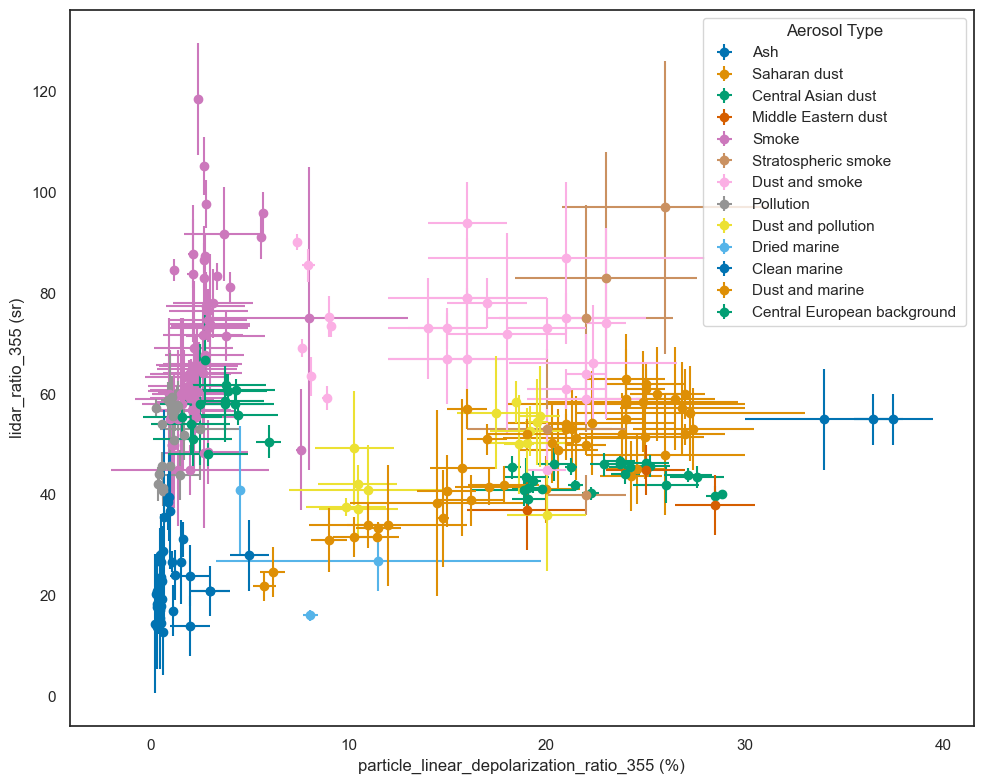

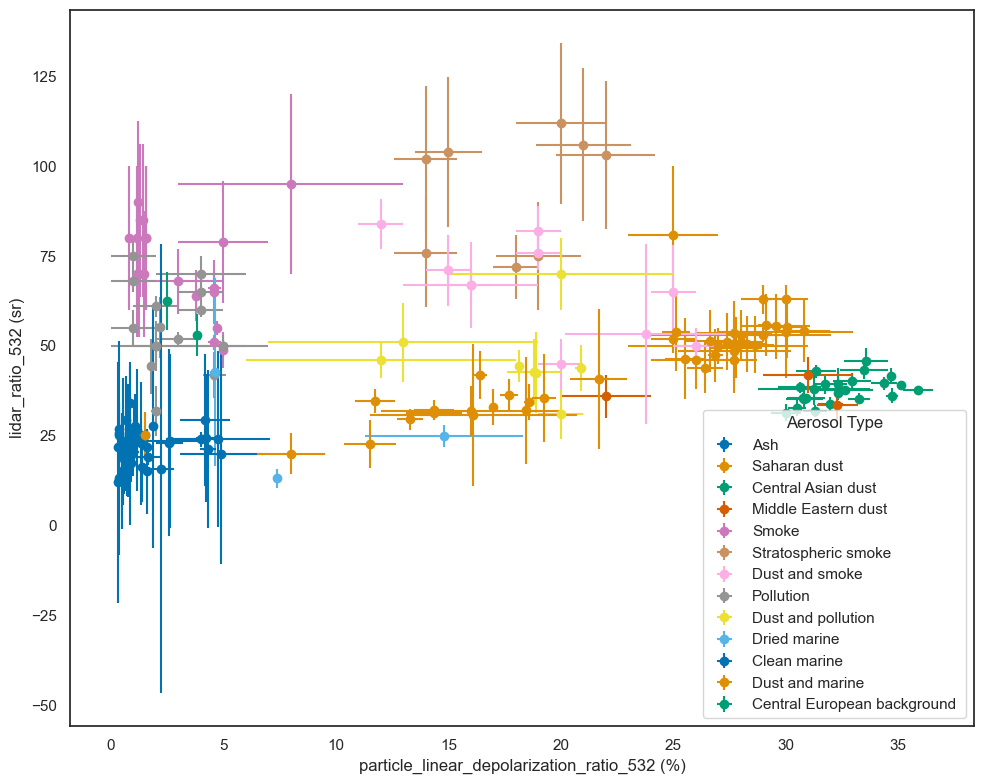

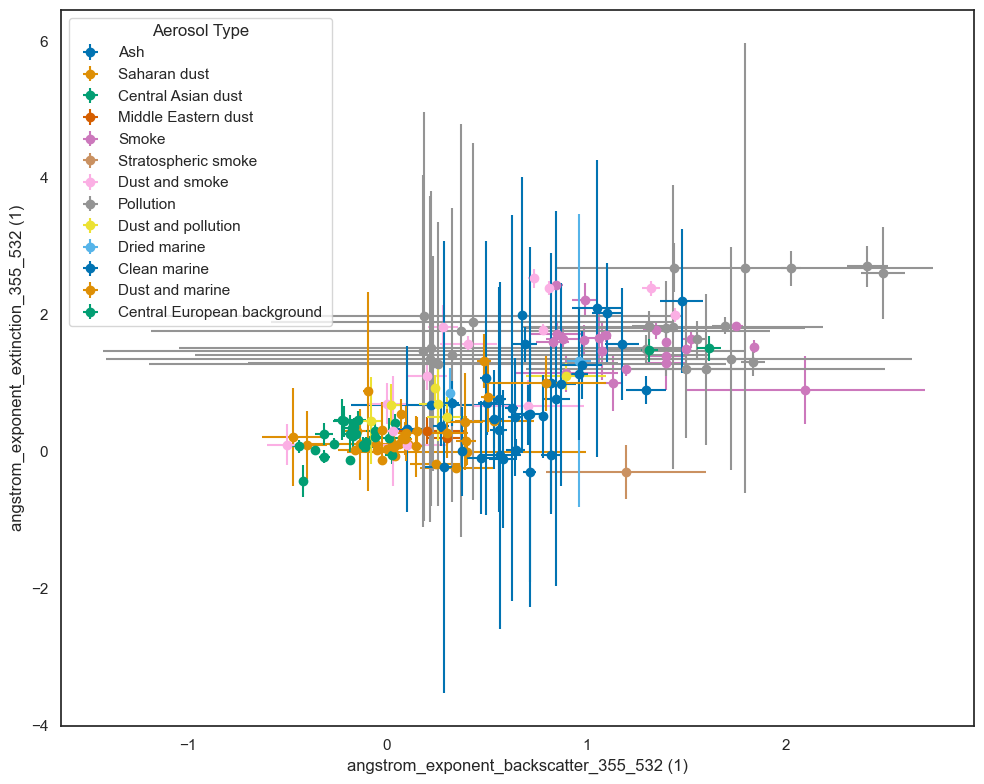

In [67]:
def visualize_with_error(df, x, y):
    plt.figure(figsize=(10, 8))
    sns.set_style("white")
    for aerosol_type in delian_df['aerosol'].unique():
        subset = df[delian_df['aerosol'] == aerosol_type]
        
        valid_subset = subset[(subset['error_' + x] != 9999) & 
                              (subset['error_' + y] != 9999)]
        
        plt.errorbar(valid_subset[x], valid_subset[y],
                    xerr=valid_subset['error_' + x], yerr=valid_subset['error_' + y],
                    fmt = "o", label=aerosol_type)
    
    plt.legend(title='Aerosol Type')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.tight_layout()
    plt.show()

visualize_with_error(delian_df, 'particle_linear_depolarization_ratio_355 (%)', 'lidar_ratio_355 (sr)')
visualize_with_error(delian_df, 'particle_linear_depolarization_ratio_532 (%)', 'lidar_ratio_532 (sr)')
visualize_with_error(delian_df, 'angstrom_exponent_backscatter_355_532 (1)', 'angstrom_exponent_extinction_355_532 (1)')

## **2.3. Data Imputation**

We impute the error values of a column (variable), i.e. `-9999.0` equals the means (excepting `-9999.0`) of that variable. 

**Note:** we calculate the means and impute for each aerosol, using the `groupby` command.

In [13]:
def mean_without_9999(column):
    mean = column[abs(column) != 9999.].mean()
    return mean

def replace_9999(column):
    mean = mean_without_9999(column)
    column[abs(column) == 9999.] = mean
    return column

df = delian_df.groupby('aerosol', observed=True).transform(replace_9999)

df.head()

,angstrom_exponent_backscatter_355_532 (1),error_angstrom_exponent_backscatter_355_532 (1),angstrom_exponent_backscatter_532_1064 (1),error_angstrom_exponent_backscatter_532_1064 (1),angstrom_exponent_extinction_355_532 (1),error_angstrom_exponent_extinction_355_532 (1),lidar_ratio_355 (sr),error_lidar_ratio_355 (sr),lidar_ratio_532 (sr),error_lidar_ratio_532 (sr),particle_linear_depolarization_ratio_355 (%),error_particle_linear_depolarization_ratio_355 (%),particle_linear_depolarization_ratio_532 (%),error_particle_linear_depolarization_ratio_532 (%)
0,0.610000,0.400000,1.025000,0.430000,0.840000,0.63000,55.0,5.0,48.00000,7.500000,36.5,1.000000,NaN,NaN
1,0.610000,0.400000,1.025000,0.430000,0.840000,0.63000,55.0,5.0,48.00000,7.500000,37.5,2.000000,NaN,NaN
2,0.220000,0.400000,1.050000,0.430000,0.680000,0.63000,39.0,10.0,32.00000,4.000000,36.0,2.333333,NaN,NaN
3,1.000000,0.400000,1.000000,0.430000,1.000000,0.63000,55.0,10.0,64.00000,11.000000,34.0,4.000000,NaN,NaN
4,0.028737,0.109849,0.459035,0.117678,0.100489,0.17537,63.0,9.0,53.06897,7.863113,24.0,2.000000,31.0,1.0


We still have the value NaN in two columns `particle_linear_depolarization_ratio_532 (%)` and `error_particle_linear_depolarization_ratio_532 (%)`. That is because this optical property does not have any valid value for the `Ash` aerosol. So we will impute it as the mean of all measured values of all aerosols.

In [14]:
from sklearn.impute import SimpleImputer

# Create an imputer object to fill NaNs with the mean of each column
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Fit the imputer and transform the scaled data to fill in NaNs
df_imputed = imputer.fit_transform(df)

df_imputed = pd.DataFrame(df_imputed, columns=df.columns)

df_imputed.head()

,angstrom_exponent_backscatter_355_532 (1),error_angstrom_exponent_backscatter_355_532 (1),angstrom_exponent_backscatter_532_1064 (1),error_angstrom_exponent_backscatter_532_1064 (1),angstrom_exponent_extinction_355_532 (1),error_angstrom_exponent_extinction_355_532 (1),lidar_ratio_355 (sr),error_lidar_ratio_355 (sr),lidar_ratio_532 (sr),error_lidar_ratio_532 (sr),particle_linear_depolarization_ratio_355 (%),error_particle_linear_depolarization_ratio_355 (%),particle_linear_depolarization_ratio_532 (%),error_particle_linear_depolarization_ratio_532 (%)
0,0.610000,0.400000,1.025000,0.430000,0.840000,0.63000,55.0,5.0,48.00000,7.500000,36.5,1.000000,10.883079,0.909911
1,0.610000,0.400000,1.025000,0.430000,0.840000,0.63000,55.0,5.0,48.00000,7.500000,37.5,2.000000,10.883079,0.909911
2,0.220000,0.400000,1.050000,0.430000,0.680000,0.63000,39.0,10.0,32.00000,4.000000,36.0,2.333333,10.883079,0.909911
3,1.000000,0.400000,1.000000,0.430000,1.000000,0.63000,55.0,10.0,64.00000,11.000000,34.0,4.000000,10.883079,0.909911
4,0.028737,0.109849,0.459035,0.117678,0.100489,0.17537,63.0,9.0,53.06897,7.863113,24.0,2.000000,31.000000,1.000000


We check the quality of the imputed data.

In [15]:
df_imputed.duplicated().sum()

0

In [16]:
df_imputed.describe().T

,count,mean,std,min,25%,50%,75%,max
angstrom_exponent_backscatter_355_532 (1),316.0,0.779530,0.617844,-0.500000,0.272608,0.814661,1.365803,2.489430
error_angstrom_exponent_backscatter_355_532 (1),316.0,0.187158,0.268275,0.000214,0.047562,0.100000,0.183696,1.621820
angstrom_exponent_backscatter_532_1064 (1),316.0,0.799295,0.430504,-0.241943,0.491313,0.864506,1.166186,2.148480
error_angstrom_exponent_backscatter_532_1064 (1),316.0,0.168427,0.203761,0.000000,0.054529,0.109771,0.141246,1.151870
angstrom_exponent_extinction_355_532 (1),316.0,0.943316,0.692282,-0.428108,0.356404,0.932919,1.492750,2.706950
error_angstrom_exponent_extinction_355_532 (1),316.0,0.615900,0.651982,0.000501,0.177300,0.360162,0.820808,3.309086
lidar_ratio_355 (sr),316.0,50.673770,19.096687,12.821490,39.963554,51.113568,60.439445,118.548560
error_lidar_ratio_355 (sr),316.0,7.055542,5.290999,0.566400,3.323110,5.576068,9.000000,30.000000
lidar_ratio_532 (sr),316.0,49.166890,20.697239,12.063000,32.055051,48.000000,68.000000,112.000000
error_lidar_ratio_532 (sr),316.0,9.229730,6.964022,0.860434,4.563627,8.020870,11.135828,62.445038


## **Principal Componants Analysis** 

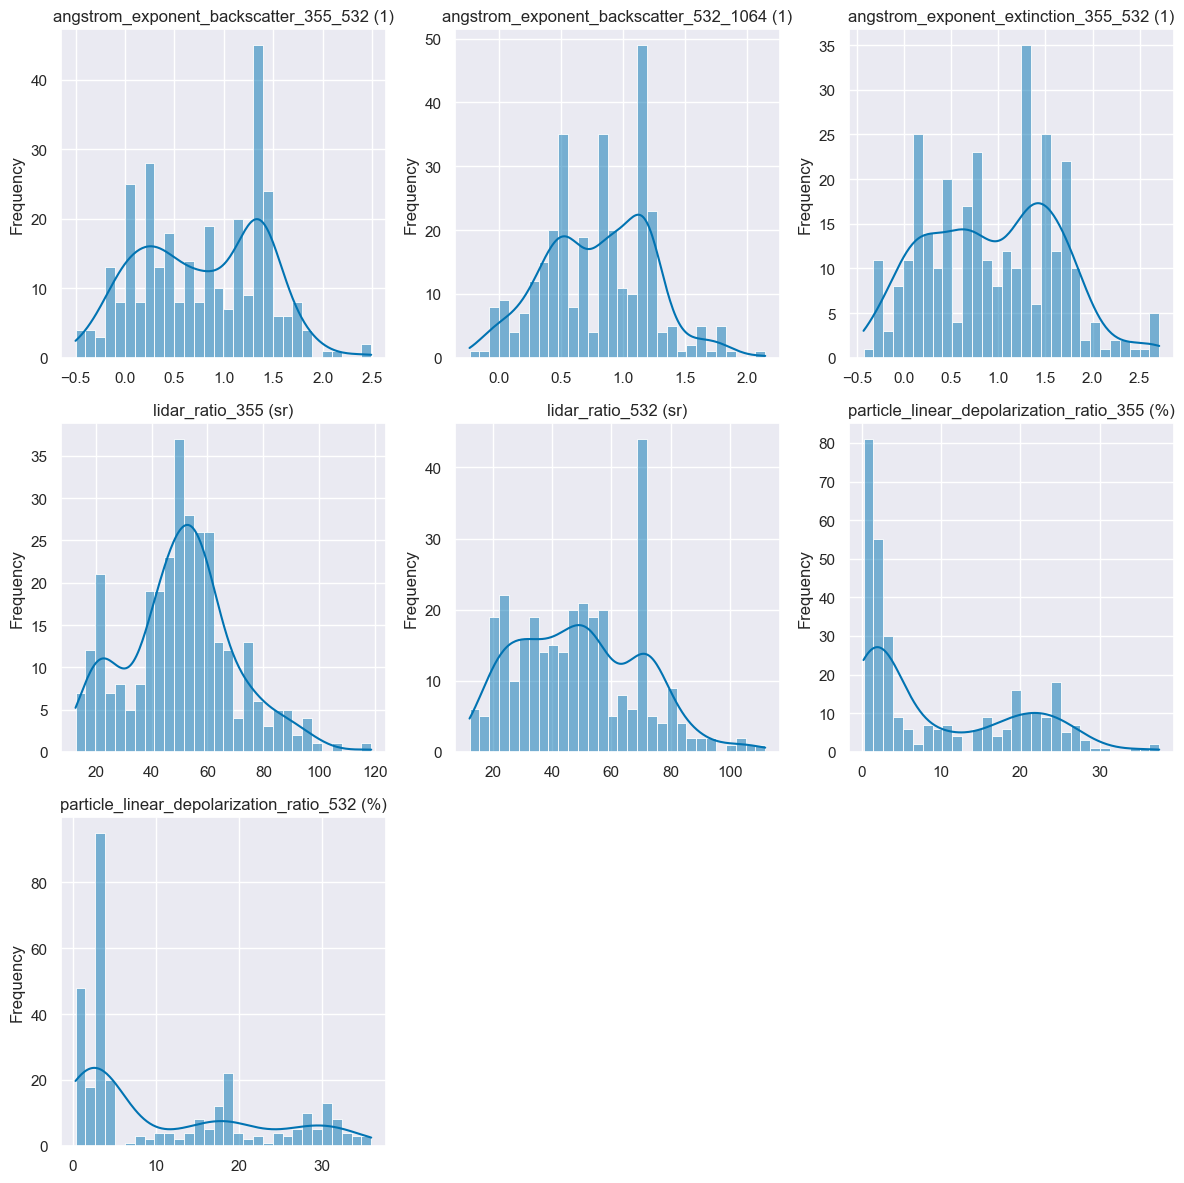

In [69]:
sns.set_style('darkgrid')
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
axes = axes.flatten()

for i, column in enumerate(properties):
    sns.histplot(data=df_imputed[column], bins = 30, kde=True, ax=axes[i])  
    axes[i].set_title(f'{column}')  # Set title for the plot
    axes[i].set_ylabel('Frequency')
    axes[i].set_xlabel(None)

# Adjust layoutcolumns)
axes[-1].set_visible(False)
axes[-2].set_visible(False)
plt.tight_layout()
plt.show()

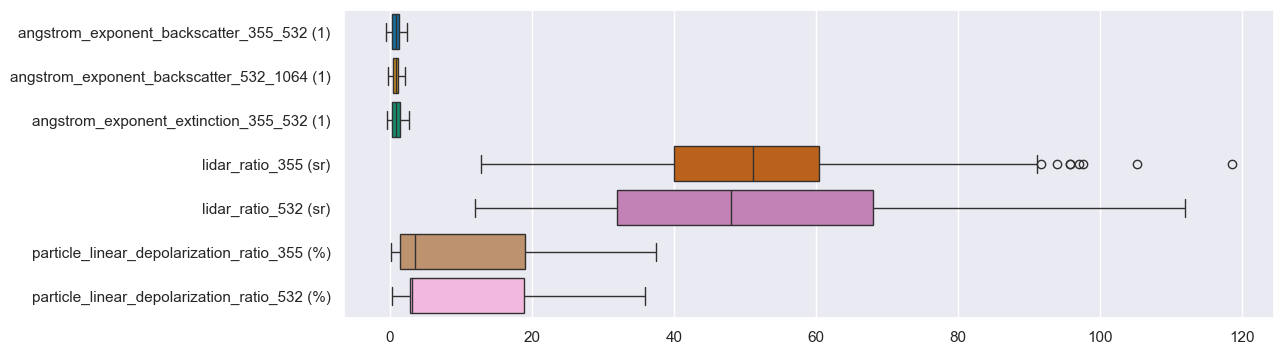

In [75]:
plt.figure(figsize=(12, 4))
sns.boxplot(data=df_imputed[properties], orient='h')  # 'h' for horizontal boxplots

plt.show()

In [19]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
ss = StandardScaler()

# Fit and transform the data
df_scaled = ss.fit_transform(df_imputed[properties])

# Convert the scaled data back to a DataFrame
df_scaled = pd.DataFrame(df_scaled, columns = properties)

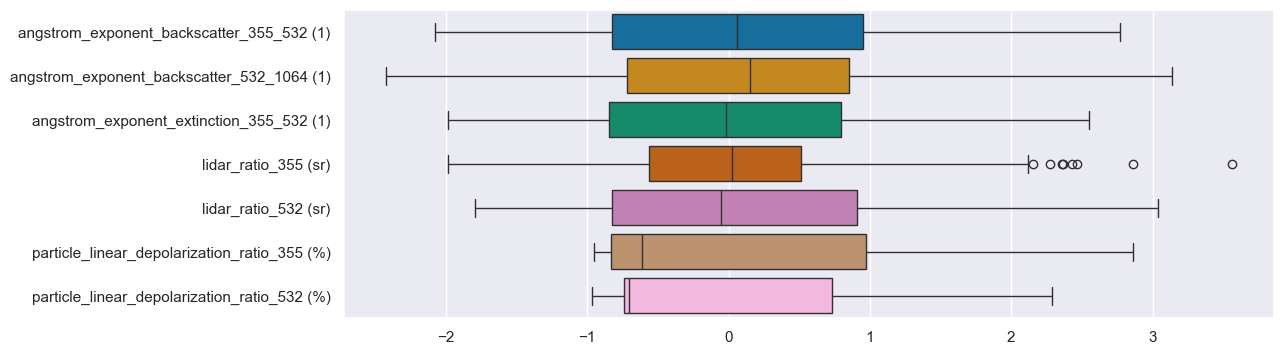

In [76]:
plt.figure(figsize=(12, 4))
sns.boxplot(data=df_scaled, orient='h')  # 'h' for horizontal boxplots

plt.show()

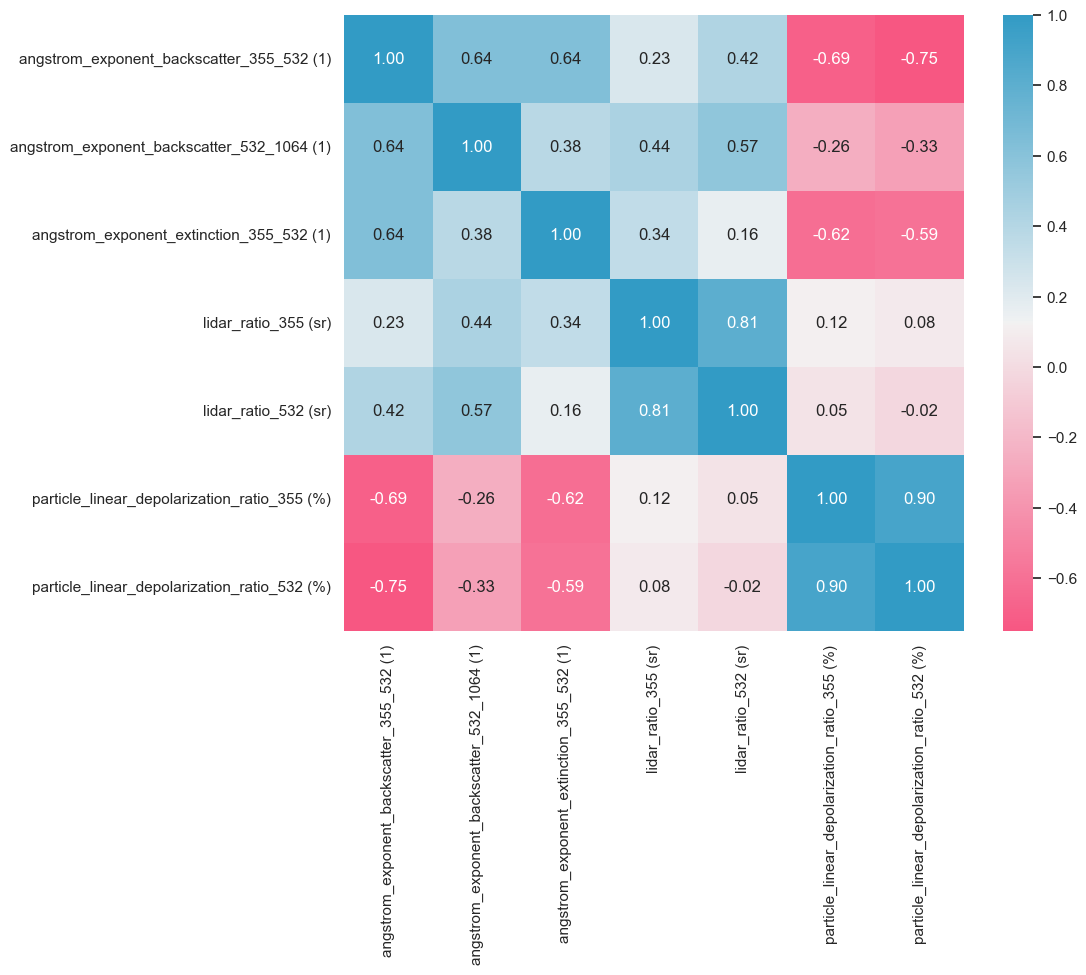

In [21]:
plt.figure(figsize=(10,8))
# correlation between columns
sns.heatmap(df_scaled.corr(), annot=True, fmt='.2f', cmap=cmap)
plt.xticks(rotation=90)

plt.show()

In [22]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA()
df_pca = pca.fit_transform(df_scaled)

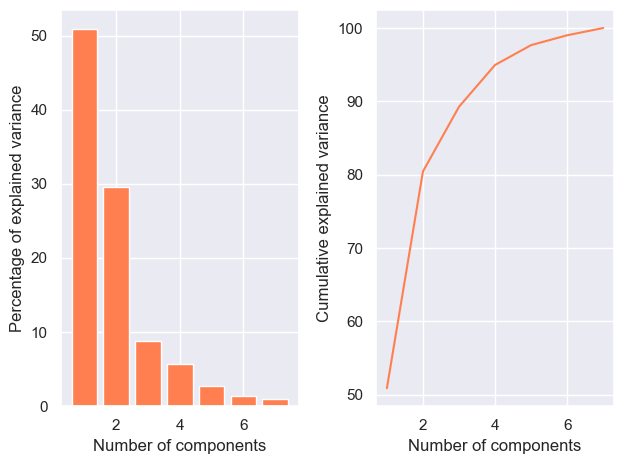

In [70]:
explained_variance_ratio = 100*pca.explained_variance_ratio_

plt.subplot(1,2,1)
n_bars = df_pca.shape[1]
plt.bar(np.arange(1, n_bars+1), explained_variance_ratio[:n_bars], color='coral')
plt.xlabel("Number of components")
plt.ylabel("Percentage of explained variance")

plt.subplot(1,2,2)
plt.plot(np.arange(1, n_bars+1), np.cumsum(explained_variance_ratio), color='coral')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

plt.tight_layout()
plt.show()

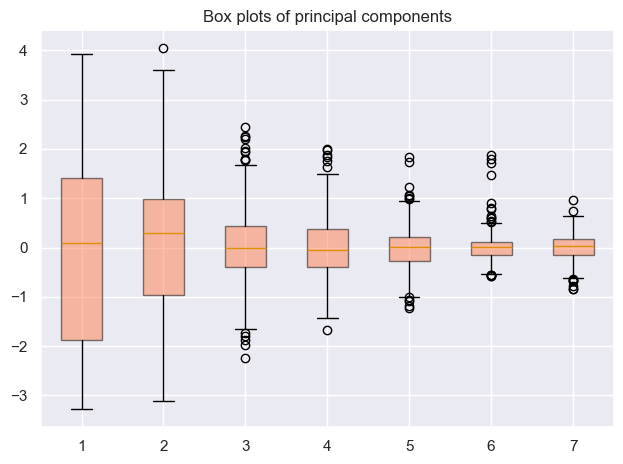

In [24]:
box = plt.boxplot(df_pca, patch_artist=True)
plt.setp(box["boxes"], facecolor="coral", alpha=.5)
plt.title("Box plots of principal components")
plt.tight_layout()
plt.show()

In [25]:
df_imputed

,angstrom_exponent_backscatter_355_532 (1),error_angstrom_exponent_backscatter_355_532 (1),angstrom_exponent_backscatter_532_1064 (1),error_angstrom_exponent_backscatter_532_1064 (1),angstrom_exponent_extinction_355_532 (1),error_angstrom_exponent_extinction_355_532 (1),lidar_ratio_355 (sr),error_lidar_ratio_355 (sr),lidar_ratio_532 (sr),error_lidar_ratio_532 (sr),particle_linear_depolarization_ratio_355 (%),error_particle_linear_depolarization_ratio_355 (%),particle_linear_depolarization_ratio_532 (%),error_particle_linear_depolarization_ratio_532 (%)
0,0.610000,0.400000,1.025000,0.430000,0.840000,0.63000,55.00,5.00,48.00000,7.500000,36.50,1.000000,10.883079,0.909911
1,0.610000,0.400000,1.025000,0.430000,0.840000,0.63000,55.00,5.00,48.00000,7.500000,37.50,2.000000,10.883079,0.909911
2,0.220000,0.400000,1.050000,0.430000,0.680000,0.63000,39.00,10.00,32.00000,4.000000,36.00,2.333333,10.883079,0.909911
3,1.000000,0.400000,1.000000,0.430000,1.000000,0.63000,55.00,10.00,64.00000,11.000000,34.00,4.000000,10.883079,0.909911
4,0.028737,0.109849,0.459035,0.117678,0.100489,0.17537,63.00,9.00,53.06897,7.863113,24.00,2.000000,31.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,1.444033,0.201567,1.234233,0.189733,1.492750,0.17730,48.07,2.24,56.19020,8.294167,2.91,2.000000,3.165000,0.093500
312,1.444033,0.201567,1.234233,0.189733,1.492750,0.17730,58.02,7.59,56.19020,8.294167,3.76,2.000000,3.165000,0.093500
313,1.444033,0.201567,1.234233,0.189733,1.492750,0.17730,58.57,5.69,56.19020,8.294167,3.75,2.000000,3.165000,0.093500
314,1.444033,0.201567,1.234233,0.189733,1.492750,0.17730,60.56,3.41,56.19020,8.294167,3.91,2.000000,3.165000,0.093500


## **Data Augmentation** 
Genrate new data based on the original data with the assumption that the properties follow the normal distributions 
*(we can compare the results before and after generation data)*

In [26]:
np.random.seed(28)

def generate_samples(individual_data, n_samples=10):
    means_columns = properties
    errors_columns = ['error_' + col for col in means_columns]
    
    means = individual_data[means_columns].astype(float).values
    errors = individual_data[errors_columns].astype(float).values
    
    generated_list = [individual_data[means_columns].values]  # Include only the properties
    
    # Generate new samples
    for _ in range(n_samples):
        # Generate random samples based on the mean and error values
        generated_values = np.random.normal(means, errors)
        generated_list.append(generated_values)
    
    generated_df = pd.DataFrame(generated_list, columns=means_columns)
    
    return generated_df

In [71]:
# Initialize a list to store DataFrames
generated_data = []

# Iterate over each row in the DataFrame
for index, row in df_imputed.iterrows():
    # Generate samples for the current row
    generated_df = generate_samples(row)
    # Append the DataFrame to the list without adding an index column
    generated_data.append(generated_df)

# Concatenate all DataFrames in the list into one DataFrame
df_generated = pd.concat(generated_data, ignore_index=True)

df_generated.head()

,angstrom_exponent_backscatter_355_532 (1),angstrom_exponent_backscatter_532_1064 (1),angstrom_exponent_extinction_355_532 (1),lidar_ratio_355 (sr),lidar_ratio_532 (sr),particle_linear_depolarization_ratio_355 (%),particle_linear_depolarization_ratio_532 (%)
0,0.610000,1.025000,0.840000,55.000000,48.000000,36.500000,10.883079
1,0.986547,0.745168,0.748589,54.633425,44.528479,37.111225,10.532341
2,0.039679,0.239334,1.094085,62.266369,47.900336,38.232415,11.642376
3,0.608731,0.357953,0.657248,56.682828,52.540736,37.745026,12.090469
4,0.179465,1.524579,1.646300,55.430835,47.512560,38.246924,8.956841


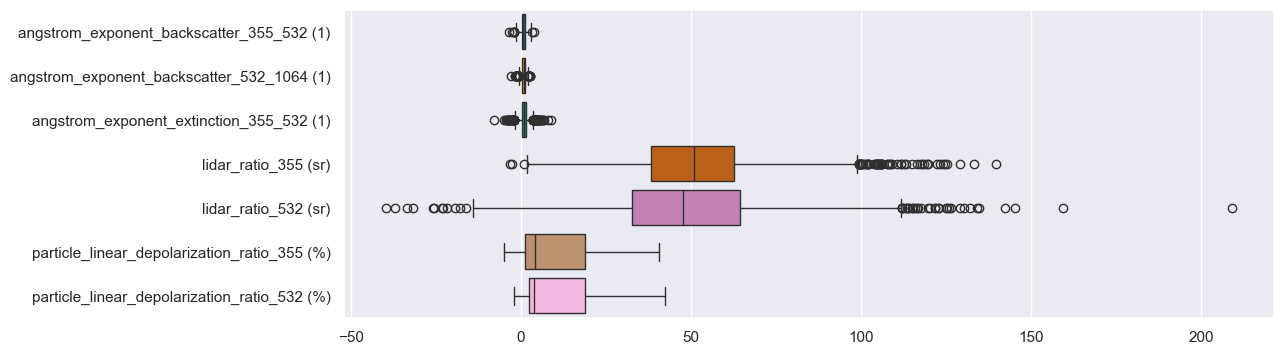

In [77]:
plt.figure(figsize=(12, 4))
sns.boxplot(data=df_generated, orient='h')  # 'h' for horizontal boxplots

plt.show()

In [29]:
#Define a new df containing the label (type of aerosol) of the df_generated
aerosol_generated = []

for col in samples.columns:
  for i in range(int(samples[col].iloc[0]) * 11):
    aerosol_generated.append(col)
    
aerosol_generated = pd.DataFrame({"aerosol": aerosol_generated})

aerosol_generated['aerosol'] = aerosol_generated['aerosol'].astype('category') #convert type from Object to Categorical

aerosol_generated

,aerosol
0,Ash
1,Ash
2,Ash
3,Ash
4,Ash
...,...
3471,Central European background
3472,Central European background
3473,Central European background
3474,Central European background


# **Build the predicted models**

In [30]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

aerosol_encoder = label_encoder.fit_transform(aerosol.values.flatten())

# Print the mapping of original labels to encoded labels
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
label_mapping


{'Ash': 0,
 'Central Asian dust': 1,
 'Central European background ': 2,
 'Clean marine': 3,
 'Dried marine': 4,
 'Dust and marine': 5,
 'Dust and pollution': 6,
 'Dust and smoke': 7,
 'Middle Eastern dust': 8,
 'Pollution': 9,
 'Saharan dust': 10,
 'Smoke': 11,
 'Stratospheric smoke': 12}

Split the data set in a controlled manner to ensure the ratio between the training set and the test set is consistent for each class.

In [31]:
aerosol_generated_encoder = label_encoder.fit_transform(aerosol_generated.values.flatten())

In [32]:
from sklearn.model_selection import train_test_split

X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(df_imputed[properties], aerosol_encoder, test_size=0.25, stratify=aerosol_encoder, shuffle=True, random_state=28)

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(df_generated, aerosol_generated_encoder, test_size=0.25, stratify=aerosol_generated_encoder, shuffle=True, random_state=28)

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(df_generated, aerosol_generated_encoder, test_size=0.25, stratify=aerosol_generated_encoder, shuffle=True, random_state=28)

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(df_generated, aerosol_generated_encoder, test_size=0.25, stratify=aerosol_generated_encoder, shuffle=True, random_state=28)

In [33]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(df_generated, aerosol_generated_encoder, test_size=0.25, stratify=aerosol_generated_encoder, shuffle=True, random_state=28)

In [34]:
ss.fit(X_train_0)
X_train_0 = ss.transform(X_train_0)
# Keep the standardization parameters unchanged for the test set
X_test_0 = ss.transform(X_test_0)

In [35]:
ss.fit(X_train_1)
X_train_1 = ss.transform(X_train_1)
# Keep the standardization parameters unchanged for the test set
X_test_1 = ss.transform(X_test_1)

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Now we present the most important function that we use everywhere in the following parts of the notebook.

In [78]:
def selection_model(model, dataset, param_list, k_fold = 3, random_state = 28):
    """select the best hyperparameters for a type of model (kNN, SVM, etc) given a dataset (df, df_generated, df_pca, etc)

    Args:
        model (object of class): type of model that we use
        dataset (_type_): the dataset that we use to train and predict
        param_list (_type_): list of hyperparameters
        k_fold (int): number of folds of cross-validation
        random_state (int): to have the consistency results

    Returns:
        selection_model: best model with the selected hyperparameters 
    """

    X_train, y_train, X_test, y_test = eval(f'(X_train_{dataset}, y_train_{dataset}, X_test_{dataset}, y_test_{dataset})')
    
    stratified_k_fold = StratifiedKFold(n_splits=k_fold, shuffle=True, random_state=random_state) # Use the appropriate number of splits for the data
    
    # n_jobs=-1 means use all available CPU cores to speed up the search process.
    models=GridSearchCV(model,param_list,cv=stratified_k_fold,n_jobs=-1, verbose =2)

    #selected_model will be the optimized version of the models after the search by cross-validation.
    selected_model=models.fit(X_train, y_train)

    print("Best score = %f, Best parameter = %s" % (selected_model.best_score_,selected_model.best_params_))

    # Predict on the test set
    y_pred = selected_model.predict(X_test)

    # Evaluate the model
    print("Accuracy on test set:", accuracy_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred, zero_division=0))
    
    return selected_model

### **K-Nearest Neighbors**

#### Before data generation

In [79]:
from sklearn.neighbors import KNeighborsClassifier
knnOpt_0 = selection_model(KNeighborsClassifier(), dataset=0, param_list={'n_neighbors':list(range(2,20))})

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best score = 0.911392, Best parameter = {'n_neighbors': 2}
Accuracy on test set: 0.8607594936708861


#### After data generation

In [80]:
knnOpt_1 = selection_model(KNeighborsClassifier(), dataset=1, param_list={'n_neighbors':list(range(2,20))})

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best score = 0.883774, Best parameter = {'n_neighbors': 3}
Accuracy on test set: 0.8883774453394706


### **Support Vector Machine (SVM)**

#### Before data generation

In [81]:
from sklearn.svm import SVC
svmOpt_0 = selection_model(SVC(), dataset=0, param_list={'C':[0.001,0.01,0.1,1,10,100,1000]})

Fitting 3 folds for each of 7 candidates, totalling 21 fits
Best score = 0.915612, Best parameter = {'C': 10}
Accuracy on test set: 0.8354430379746836


#### After data generation

In [82]:
svmOpt_1 = selection_model(SVC(), dataset=1, param_list={'C':[0.001,0.01,0.1,1,10,100,1000]})

Fitting 3 folds for each of 7 candidates, totalling 21 fits


Best score = 0.902570, Best parameter = {'C': 100}
Accuracy on test set: 0.9148446490218642


### **Decision Tree**

#### Before data generation

In [85]:
from sklearn.tree import DecisionTreeClassifier
treeOpt_0 = selection_model(DecisionTreeClassifier(random_state=28), dataset=0, param_list={"max_depth": [1, 2, 4, 8, 16, 32, 64, None]})

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best score = 0.843882, Best parameter = {'max_depth': 8}
Accuracy on test set: 0.8354430379746836


#### After data generation

In [87]:
treeOpt_1 = selection_model(DecisionTreeClassifier(random_state=28), dataset=1, param_list={"max_depth": [1, 2, 4, 8, 16, 32, 64, None]})

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best score = 0.841580, Best parameter = {'max_depth': 16}
Accuracy on test set: 0.8665132336018412


### **Random Forest**

#### Before data generation

In [89]:
from sklearn.ensemble import RandomForestClassifier

param=[{'n_estimators': [50, 100, 500],
        'max_features': [2, 3, 4],
        'max_depth' : [2, 4, 8, None]}]

rfOpt_0 = selection_model(RandomForestClassifier(random_state=28), dataset=0, param_list=param)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best score = 0.940928, Best parameter = {'max_depth': None, 'max_features': 2, 'n_estimators': 50}
Accuracy on test set: 0.9240506329113924


particle_linear_depolarization_ratio_532 (%) 0.19066936465353074
lidar_ratio_355 (sr) 0.1833917186505712
lidar_ratio_532 (sr) 0.1817209569502559
particle_linear_depolarization_ratio_355 (%) 0.14480098885472564
angstrom_exponent_extinction_355_532 (1) 0.1032169128196597
angstrom_exponent_backscatter_355_532 (1) 0.10152582571524028
angstrom_exponent_backscatter_532_1064 (1) 0.09467423235601657


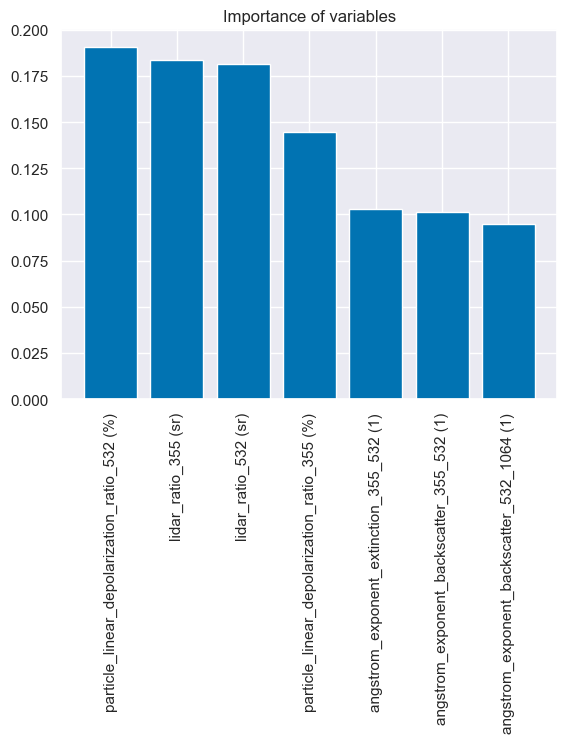

In [90]:
rf= rfOpt_0.best_estimator_

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(len(properties)):
    print(properties[indices[f]], importances[indices[f]])
    
sorted_importances = [properties[indices[f]] for f in range(len(properties))]

plt.figure()
plt.title("Importance of variables")
plt.bar(range(len(properties)), importances[indices])
plt.xticks(range(len(properties)), sorted_importances, rotation=90)
plt.show()

#### After data generation

In [91]:
rfOpt_1 = selection_model(RandomForestClassifier(random_state=28), dataset=1, param_list=param)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best score = 0.921366, Best parameter = {'max_depth': None, 'max_features': 2, 'n_estimators': 500}
Accuracy on test set: 0.9321058688147296


particle_linear_depolarization_ratio_532 (%) 0.21550137734489852
lidar_ratio_355 (sr) 0.1751168161820853
particle_linear_depolarization_ratio_355 (%) 0.15809893927546845
lidar_ratio_532 (sr) 0.14973925594947837
angstrom_exponent_backscatter_355_532 (1) 0.1126261776531716
angstrom_exponent_backscatter_532_1064 (1) 0.10678440655165965
angstrom_exponent_extinction_355_532 (1) 0.08213302704323819


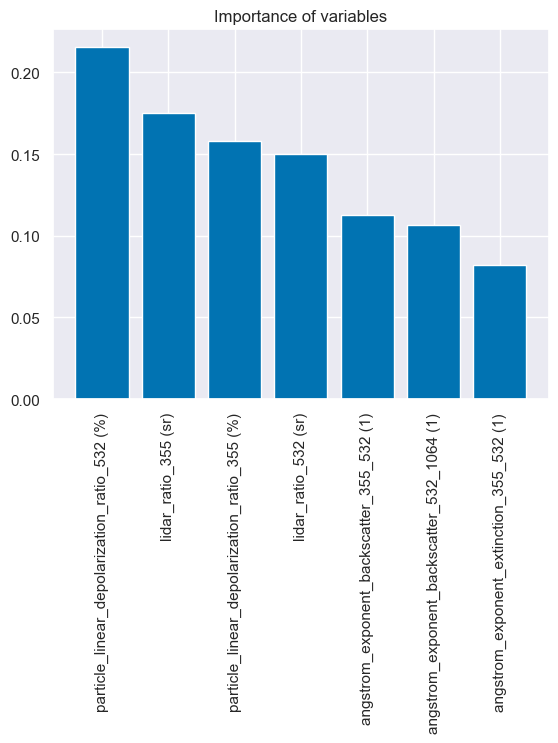

In [92]:
rf= rfOpt_1.best_estimator_

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(len(properties)):
    print(properties[indices[f]], importances[indices[f]])
    
sorted_importances = [properties[indices[f]] for f in range(len(properties))]

plt.figure()
plt.title("Importance of variables")
plt.bar(range(len(properties)), importances[indices])
plt.xticks(range(len(properties)), sorted_importances, rotation=90)
plt.show()

### **Hist Gradient Boosting**

#### Before data generation

In [93]:
from sklearn.ensemble import HistGradientBoostingClassifier

param = [{
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [2, 4, 8, None],
    'l2_regularization': [0, 0.1, 0.5]
}]

hgbOpt_0 = selection_model(HistGradientBoostingClassifier(random_state=28), dataset=0, param_list=param)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


Best score = 0.928270, Best parameter = {'l2_regularization': 0, 'learning_rate': 0.1, 'max_depth': 4}
Accuracy on test set: 0.9240506329113924


#### After data generation

In [94]:
hgbOpt_1 = selection_model(HistGradientBoostingClassifier(random_state=28), dataset=1, param_list=param)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best score = 0.927119, Best parameter = {'l2_regularization': 0, 'learning_rate': 0.1, 'max_depth': 8}
Accuracy on test set: 0.9332566168009206


### **Extreme Gradient Boosting (XGBoost)**

#### Before data generation

In [95]:
from xgboost import XGBClassifier

param = [{
    'n_estimators': [50, 100, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [2, 4, 8, None]
}]

xgbOpt_0 = selection_model(XGBClassifier(eval_metric='logloss', random_state=28), dataset=0, param_list=param)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best score = 0.902954, Best parameter = {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}
Accuracy on test set: 0.9113924050632911


#### After data generation

In [96]:
xgbOpt_1 = selection_model(XGBClassifier(eval_metric='logloss', random_state=28), dataset=1, param_list=param)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


Best score = 0.927886, Best parameter = {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 500}
Accuracy on test set: 0.9309551208285386


### **Neural Network with TensorFlow**

In [100]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

def my_neural_network(dataset, random_state = 28):
    X_train, y_train, X_test, y_test = eval(f'(X_train_{dataset}, y_train_{dataset}, X_test_{dataset}, y_test_{dataset})')
    # Model configuration
    n_features = 7
    n_classes = 13

    tf.random.set_seed(random_state)
    # Build the model
    model = Sequential([
        tf.keras.Input(shape=(n_features,)),
        Dense(128, activation='relu', name = "L1"),
        Dense(64, activation='relu', name = "L2"),
        Dense(n_classes, activation='linear', name = "L3")
    ])

    print(model.summary())

    # Compile the model
    model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=['accuracy'])

    history = model.fit(X_train, to_categorical(y_train), epochs=72, batch_size=32, validation_data = (X_test, to_categorical(y_test)))
    
    return history, model

In [101]:
history_0, nn_0 = my_neural_network(dataset = 0)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ L1 (Dense)                      │ (None, 128)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L2 (Dense)                      │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L3 (Dense)                      │ (None, 13)             │           845 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,125 (39.55 KB)

 Trainable params: 10,125 (39.55 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/72
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.1004 - loss: 2.5708 - val_accuracy: 0.3418 - val_loss: 2.3003
Epoch 2/72
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4807 - loss: 2.2391 - val_accuracy: 0.5063 - val_loss: 2.0202
Epoch 3/72
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5358 - loss: 1.9544 - val_accuracy: 0.5063 - val_loss: 1.7675
Epoch 4/72
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5140 - loss: 1.7020 - val_accuracy: 0.5316 - val_loss: 1.5622
Epoch 5/72
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5181 - loss: 1.5053 - val_accuracy: 0.5696 - val_loss: 1.4129
Epoch 6/72
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5492 - loss: 1.3635 - val_accuracy: 0.5570 - val_loss: 1.2951
Epoch 7/72
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6004 - loss: 1.2419 - val_accuracy: 0.5949 - val_loss: 1.1915
Epoch 8/72
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6654 - loss: 1.1296 - val_accuracy: 0.6203 - val_loss: 1.0993
Ep

In [102]:
history_1, nn_1 = my_neural_network(dataset = 1)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ L1 (Dense)                      │ (None, 128)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L2 (Dense)                      │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L3 (Dense)                      │ (None, 13)             │           845 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,125 (39.55 KB)

 Trainable params: 10,125 (39.55 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/72
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3727 - loss: 2.0886 - val_accuracy: 0.6951 - val_loss: 0.9530
Epoch 2/72
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7294 - loss: 0.8711 - val_accuracy: 0.7722 - val_loss: 0.6717
Epoch 3/72
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7930 - loss: 0.6539 - val_accuracy: 0.7975 - val_loss: 0.5715
Epoch 4/72
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8161 - loss: 0.5620 - val_accuracy: 0.8182 - val_loss: 0.5203
Epoch 5/72
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8244 - loss: 0.5095 - val_accuracy: 0.8239 - val_loss: 0.4866
Epoch 6/72
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8336 - loss: 0.4735 - val_accuracy: 0.8354 - val_loss: 0.4606
Epoch 7/72
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8474 - loss: 0.4458 - val_accuracy: 0.8389 - val_loss: 0.4411
Epoch 8/72
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8545 - loss: 0.4236 - val_accuracy: 0.8423 - val_

Text(0.5, 1.0, 'Accuracy')

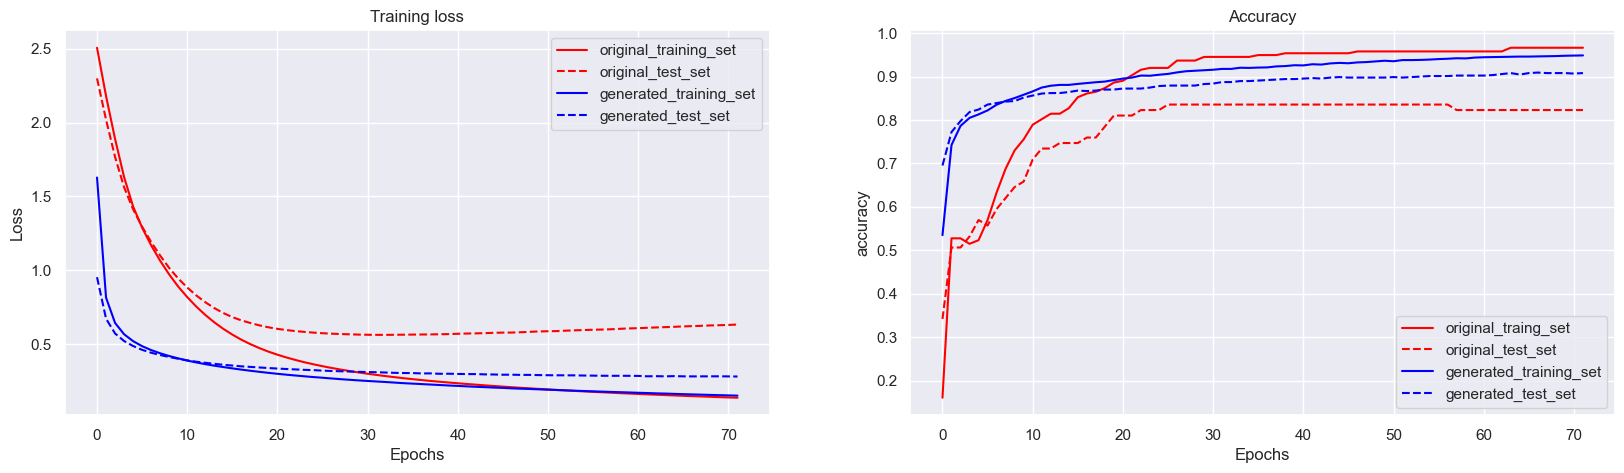

In [103]:
# %load solutions/compare_loss_acc.py
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,2,1)
ax.plot(history_0.history["loss"], label="original_training_set", color="red")
ax.plot(history_0.history["val_loss"], label="original_test_set", linestyle="dashed" ,color="red")
ax.plot(history_1.history["loss"], label="generated_training_set", color="blue")
ax.plot(history_1.history["val_loss"], label="generated_test_set", linestyle="dashed" ,color="blue")
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax.set_title("Training loss")
ax.legend(loc='best')
ax = fig.add_subplot(1,2,2)
ax.plot(history_0.history["accuracy"], label="original_traing_set", color="red")
ax.plot(history_0.history["val_accuracy"], label="original_test_set", linestyle="dashed" ,color="red")
ax.plot(history_1.history["accuracy"], label="generated_training_set", color="blue")
ax.plot(history_1.history["val_accuracy"], label="generated_test_set", linestyle="dashed" ,color="blue")
ax.set_ylabel("accuracy")
ax.set_xlabel("Epochs")
ax.legend(loc='best')
ax.set_title("Accuracy")